In [49]:
import sys
import operator
import parse as p
import author_network as an
import regression as re
import numpy as np
import networkx as nx
import graphviz as gv
from matplotlib import pyplot as plt
import matplotlib
from community import community_louvain
import collections
from node2vec import Node2Vec
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

## Reading Files and Preparing Data

### Read and parse .json files

In [4]:
#files = ['../data/icml2019.json']
#files = ['../data/icml2019.json','../data/icml2018.json','../data/icml2017.json']

#files = ['../data/icml2019.json','../data/icml2018.json','../data/icml2017.json'
#        , '../data/nips2019.json', '../data/nips2018.json', '../data/nips2017.json']
files_17 = ['../data/icml2017.json', '../data/nips2017.json']
files_18 = ['../data/icml2018.json', '../data/nips2018.json']
files_19 = ['../data/icml2019.json', '../data/nips2019.json']

#years = '(2017-2019, ICML&NIPS)'
#years = '(2017-2019, ICML)'
#years = '(2019, ICML)'
#re_years = [2017, 2018, 2019]
#re_years = [2019]
#target = [2020, 2021]
figsize = (150,150)
#figsize = (100,100)
figsize_i = (1000,1000)
#DRAW = False

author_list_17, paper_list_17 = p.parse_json(files_17)
author_list_18, paper_list_18 = p.parse_json(files_18)
author_list_19, paper_list_19 = p.parse_json(files_19)

Read 2 files, 1113 papers and 2995 authors
Read 2 files, 1630 papers and 4492 authors
Read 2 files, 2200 papers and 6078 authors


In [5]:
temp, temp_ = p.get_paper_count(author_list_17)
author_names_17 = temp[0]
paper_counts_17 = temp[1]
sorted_author_names_17 = temp_[0]
sorted_paper_counts_17 = temp_[1]

temp, temp_ = p.get_paper_count(author_list_18)
author_names_18 = temp[0]
paper_counts_18 = temp[1]
sorted_author_names_18 = temp_[0]
sorted_paper_counts_18 = temp_[1]

temp, temp_ = p.get_paper_count(author_list_19)
author_names_19 = temp[0]
paper_counts_19 = temp[1]
sorted_author_names_19 = temp_[0]
sorted_paper_counts_19 = temp_[1]

### Researchers with most papers

In [18]:
def researchers_with_most_papers(sorted_author_names, sorted_paper_counts,year):
    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_axes([0,0,1,1])
    for label in ax.xaxis.get_ticklabels() :
        label.set_rotation(45)
    ax.bar(sorted_author_names[:10],sorted_paper_counts[:10], width = 0.5)
    plt.xlabel('Names')
    plt.ylabel('# of Papers')
    plt.title('Top 10 Authors With Most Papers('+year+')')
    plt.savefig('../image/network/authors_with_most_papers'+year+'.pdf', 
                bbox_inches='tight')
    plt.show()

In [64]:
def p_h_graph(sorted_author_names, sorted_paper_counts, year):
    font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

    matplotlib.rc('font', **font)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_axes([0,0,1,1])
    for label in ax.xaxis.get_ticklabels() :
        label.set_rotation(45)
    ax.barh(sorted_author_names[:10],sorted_paper_counts[:10])
    #plt.xlabel('Names')
    plt.xlabel('# of Papers')
    #plt.title('Top 10 Authors With Most Papers')
    plt.savefig('../image/network/authors_with_most_papers'+year+'.pdf', 
            bbox_inches='tight')
    plt.show()

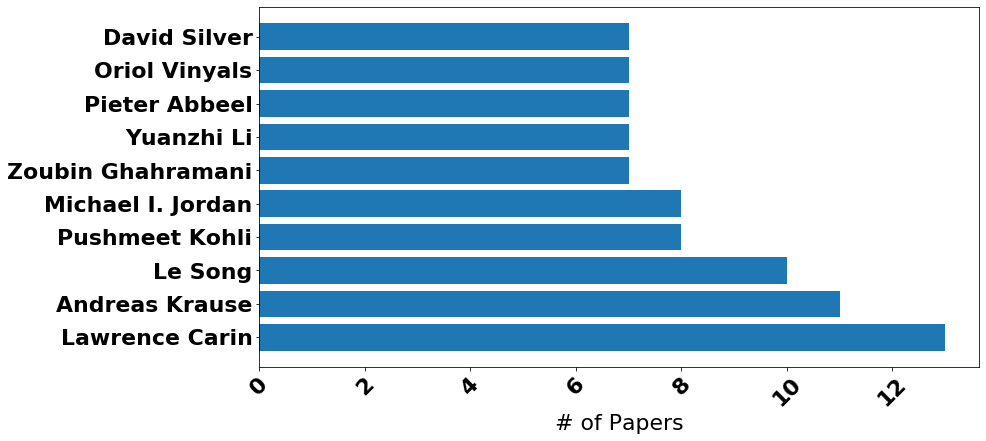

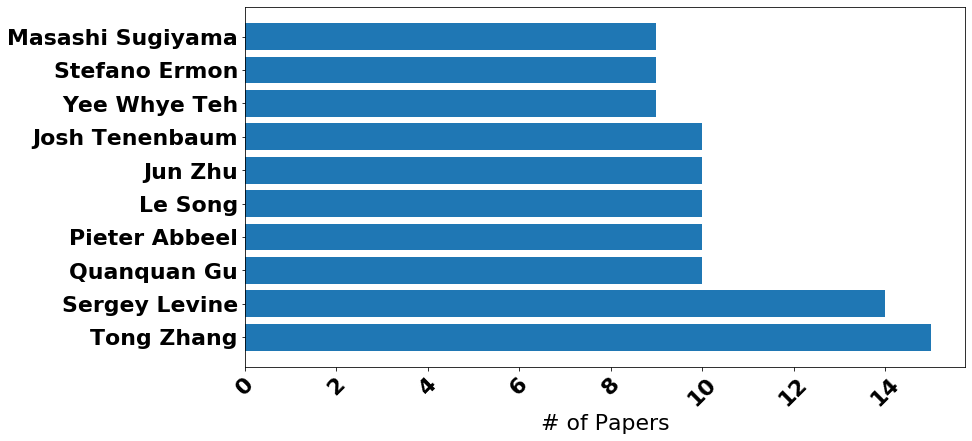

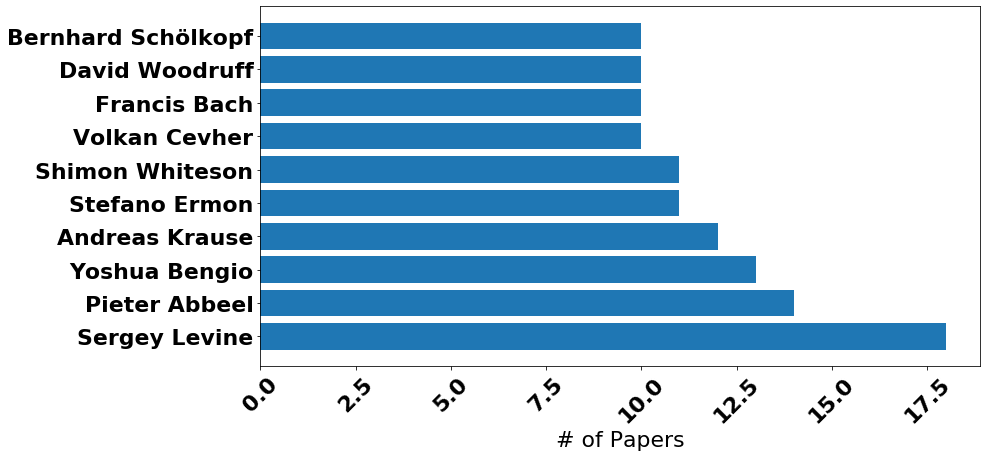

In [65]:
p_h_graph(sorted_author_names_17, sorted_paper_counts_17,'(2017)')
p_h_graph(sorted_author_names_18, sorted_paper_counts_18,'(2018)')
p_h_graph(sorted_author_names_19, sorted_paper_counts_19,'(2019)')

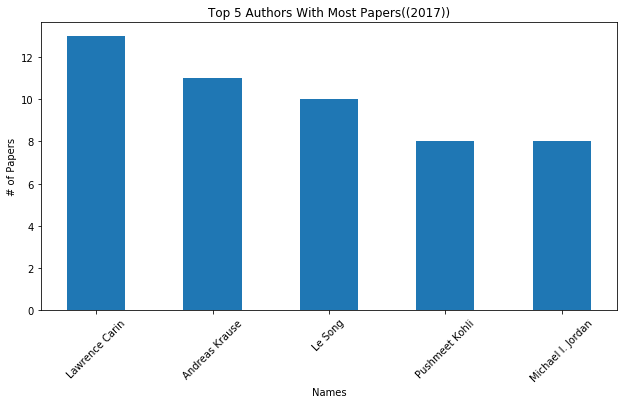

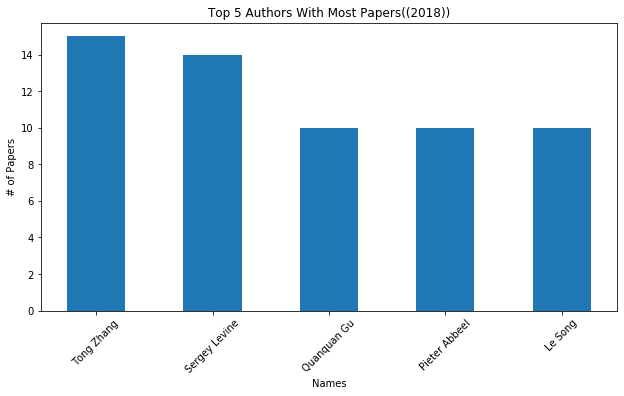

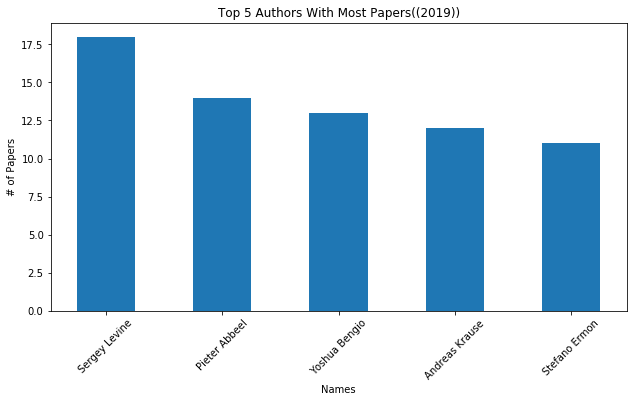

In [22]:
researchers_with_most_papers(sorted_author_names_17, sorted_paper_counts_17,'(2017)')
researchers_with_most_papers(sorted_author_names_18, sorted_paper_counts_18,'(2018)')
researchers_with_most_papers(sorted_author_names_19, sorted_paper_counts_19,'(2019)')

### Researchers who has been working with the most research groups

#### 2) Betweeness centrality

In [36]:
def get_graph(author_list, paper_list, author_names, paper_counts):
    edges, alone = an.get_edges(author_list, paper_list)
    G = nx.MultiGraph()
    G.add_edges_from(edges)
    G.add_nodes_from(alone)
    for i in range(len(author_names)):
        G.nodes[author_names[i]]['papers'] = paper_counts[i]
    return G

In [72]:
def betweeness_cen(G):
    G_b = nx.Graph(G)
    Cb_dict = nx.betweenness_centrality(G_b)
    Cb = sorted(Cb_dict.items(), key=operator.itemgetter(1), reverse = True)
    sorted_centrality_names = [x[0] for x in Cb]
    sorted_centrality_counts = [x[1] for x in Cb]
    
    return Cb_dict, sorted_centrality_names, sorted_centrality_counts

In [40]:
def bc_graph(sorted_centrality_names, sorted_centrality_counts, year):
    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_axes([0,0,1,1])
    for label in ax.xaxis.get_ticklabels() :
        label.set_rotation(45)
    ax.bar(sorted_centrality_names[:10], sorted_centrality_counts[:10], width = 0.8)
    plt.xlabel('Names')
    plt.ylabel('Betweeness Centerality')
    plt.title('Top 10 Authors Who Worked With Other Research Group Most(betweeness centrality, '+year+')')
    plt.savefig('../image/network/authors_with_most_rg_betweeness'+year+'.pdf', 
                bbox_inches='tight')
    plt.show()

In [58]:
def bc_h_graph(sorted_centrality_names, sorted_centrality_counts, year):
    font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

    matplotlib.rc('font', **font)
    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_axes([0,0,1,1])
    for label in ax.xaxis.get_ticklabels() :
        label.set_rotation(45)
    ax.barh(sorted_centrality_names[:10], sorted_centrality_counts[:10])
    #plt.ylabel('Names')
    plt.xlabel('Betweeness Centerality')
    #plt.title('Top 10 Authors Who Worked With Other Research Group Most(betweeness centrality, '+year+')')
    plt.savefig('../image/network/authors_with_most_rg_betweeness'+year+'.pdf', 
                bbox_inches='tight')
    plt.show()

In [101]:
def get_bc_vector(cb_dict, names, years):
    years.sort()
    author_vec = []
    b_year = int(years[0])

    i = 0
    for name in names:
        author_vec.append([0 for year in years])
        for year in years:
            index = year - b_year
            if name in cb_dict[index].keys():
                author_vec[i][index] = cb_dict[index][name]
            else:
                author_vec[i][index] = 0.0
        i += 1

    return author_vec

def get_bc_regression(cb_dict, names, years, target):
    author_vec = get_bc_vector(cb_dict, names, years)
    total_vec = author_vec
    author_name = [name for name in names]
    
    if (len(target) == 0):
        return [[x for _,x in sorted(zip(total_vec, author_name)
        , key=lambda y: y[0][0]+y[0][1]+y[0][2], reverse=True)],
        sorted(total_vec, key=lambda x: x[0]+x[1]+x[2], reverse=True)]

    for t in target:
        predictions = []
        for vec in author_vec:
            line = LinearRegression()
            line.fit(np.array(years).reshape(-1,1)
                    , np.array(vec))
            predict = line.predict([[t]])
            predictions.append(predict[0])
        temp = total_vec
        total_vec =  [temp[i]+[predictions[i]]
                    for i in range(len(temp))]
    

    return [[x for _,x in sorted(zip(total_vec, author_name)
        , key=lambda y: y[0][len(years)], reverse=True)],
        sorted(total_vec, key=lambda x: x[len(years)], reverse=True)]

In [73]:
G_17 = get_graph(author_list_17, paper_list_17, author_names_17, paper_counts_17)
cb_17, cen_names_17, cen_counts_17 = betweeness_cen(G_17)
G_18 = get_graph(author_list_18, paper_list_18, author_names_18, paper_counts_18)
cb_18, cen_names_18, cen_counts_18 = betweeness_cen(G_18)
G_19 = get_graph(author_list_19, paper_list_19, author_names_19, paper_counts_19)
cb_19, cen_names_19, cen_counts_19 = betweeness_cen(G_19)

In [83]:
cb_total = [cb_17, cb_18, cb_19]

In [79]:
results_list = [[1,2,3], [1,2,4]]
list(set().union(*results_list))

[1, 2, 3, 4]

In [84]:
temp = [author_names_17, author_names_18, author_names_19]
author_names = list(set().union(*temp))

In [115]:
from sklearn.linear_model import LinearRegression

re_years = [2017, 2018, 2019]
#re_years = [2019]
target = []
sort_author_name, sort_author_predict = get_bc_regression(
    cb_total, author_names, re_years, target)

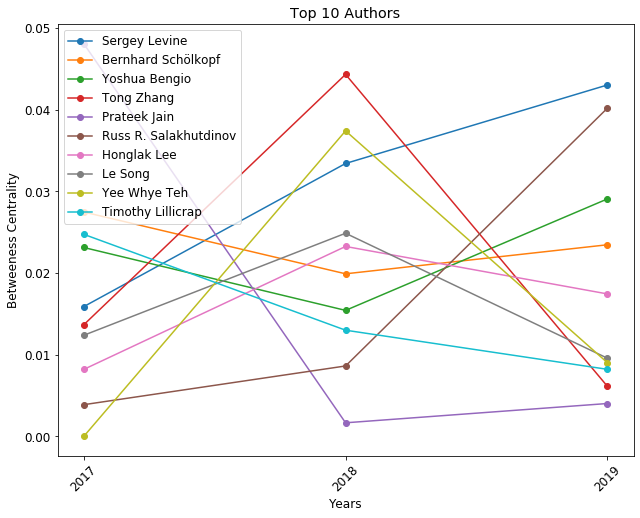

In [116]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0,0,1,1])
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
total_years = re_years + target
ax.set_xticks(total_years)
for i in range(10):
    plt.plot(total_years, sort_author_predict[i],"o-",
             label=sort_author_name[i]
            )
plt.legend(loc='upper left')
plt.xlabel('Years')
plt.ylabel('Betweeness Centrality')
plt.title('Top 10 Authors')
plt.savefig('../image/network/line_graph_bc.pdf', 
            bbox_inches='tight')
plt.show()

In [108]:
total_years

[2017, 2018, 2019, 2019]

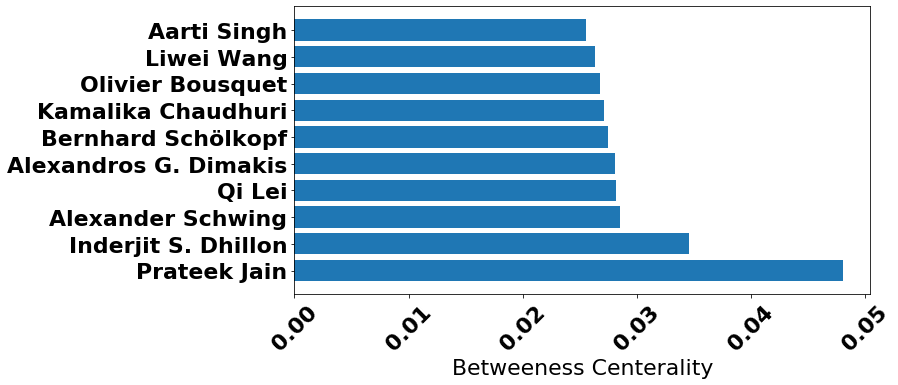

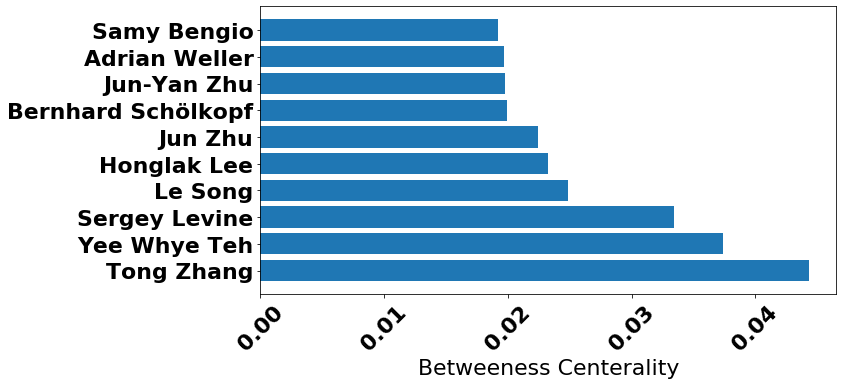

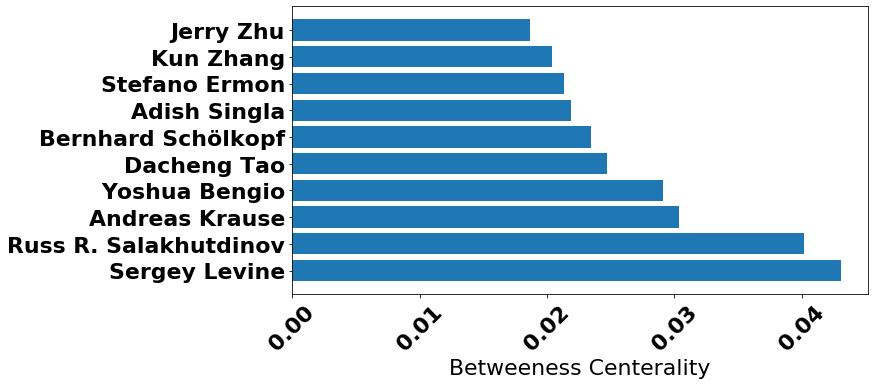

In [60]:
bc_h_graph(cen_names_17, cen_counts_17, '2017')
bc_h_graph(cen_names_18, cen_counts_18, '2018')
bc_h_graph(cen_names_19, cen_counts_19, '2019')

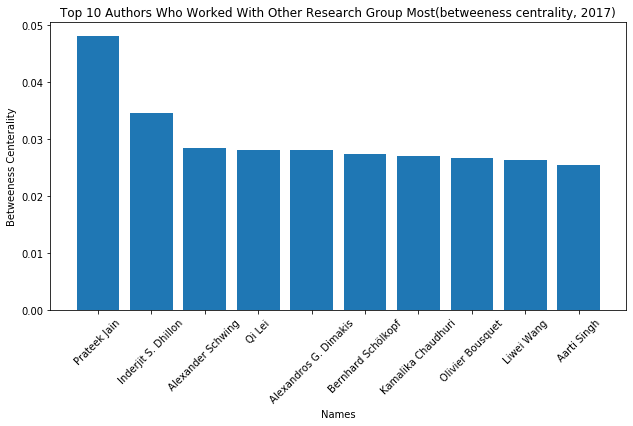

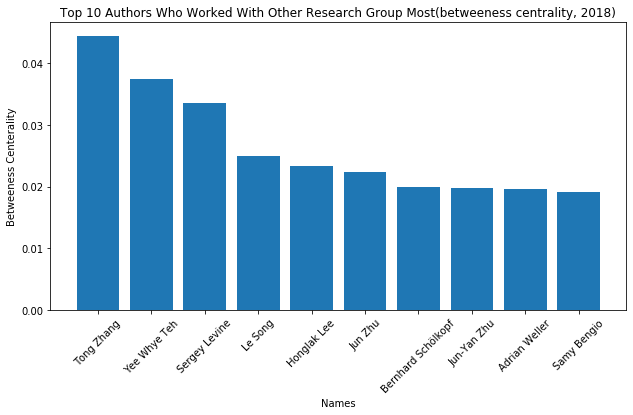

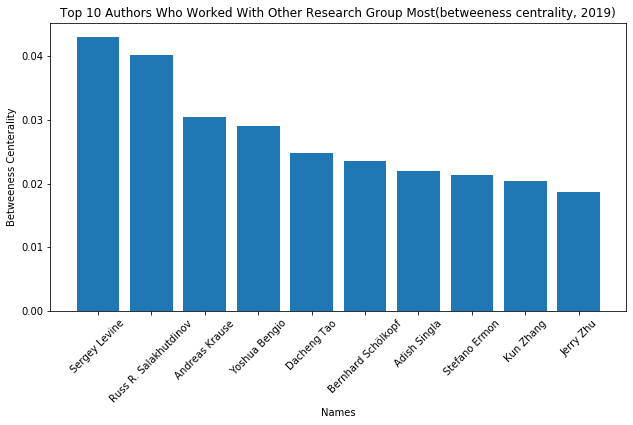

In [41]:
G_17 = get_graph(author_list_17, paper_list_17, author_names_17, paper_counts_17)
cen_names_17, cen_counts_17 = betweeness_cen(G_17)
bc_graph(cen_names_17, cen_counts_17, '2017')
G_18 = get_graph(author_list_18, paper_list_18, author_names_18, paper_counts_18)
cen_names_18, cen_counts_18 = betweeness_cen(G_18)
bc_graph(cen_names_18, cen_counts_18, '2018')
G_19 = get_graph(author_list_19, paper_list_19, author_names_19, paper_counts_19)
cen_names_19, cen_counts_19 = betweeness_cen(G_19)
bc_graph(cen_names_19, cen_counts_19, '2019')

### Researchers in Graph

#### 1) Top N researchers with most papers

In [ ]:
N = 20
paper_colormap = an.make_colormap(G, sorted_author_names, author_list, N, ['blue', 'beige'])
plt.figure(figsize = figsize)
nx.draw_networkx(G, 
                 pos=sp, 
                 with_labels=False, 
                 node_size=node_size,
                 node_color=paper_colormap, 
                 alpha=0.7
                )
# plt.axes('off')
#plt.title('Researchers With Most Papers')
plt.savefig('../image/network/graph_top_paper'+years+'.pdf', 
            bbox_inches='tight')
plt.show()

#### 2) Top N researchers of betweeness centrality

In [ ]:
N = 20
centrality_colormap = an.make_colormap(G, sorted_centrality_names, author_list, N, ['blue', 'beige'])
plt.figure(figsize = figsize) 
nx.draw_networkx(G, 
                 pos=sp, 
                 with_labels=False, 
                 node_size=node_size,
                 node_color=centrality_colormap, 
                 alpha=0.7
                )
# plt.axes('off')
#plt.title('Researchers With Top Betweeness Centrality')
plt.savefig('../image/network/graph_top_paper'+years+'.pdf', 
            bbox_inches='tight')
plt.show()